In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
netflix_language = pd.read_csv("Resources/netflix_language.csv")
netflix_language

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/2008 0:00,3/4/2021 0:00,205926.0
1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Spanish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/2008 0:00,3/4/2021 0:00,205926.0
2,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,70632.0,5/8/2020 0:00,3/4/2021 0:00,2838.0
3,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,12/3/2020 0:00,3/3/2021 0:00,131.0
4,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,6/14/2011 0:00,3/3/2021 0:00,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...",Portuguese,Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,PG-13,6.2,65.0,57.0,NaN,11.0,57231747.0,4/23/2004 0:00,4/14/2015 0:00,167842.0
14312,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Not Rated,6.2,89.0,65.0,1.0,NaN,NaN,1/22/2010 0:00,4/14/2015 0:00,878.0
14313,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,NaN,7.3,NaN,NaN,NaN,NaN,NaN,9/17/1988 0:00,4/14/2015 0:00,14.0
14314,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,NaN,7.8,NaN,NaN,NaN,NaN,NaN,1/13/2012 0:00,4/14/2015 0:00,174.0


In [3]:
languagecount = netflix_language.groupby(by='Title')['Languages'].count()

In [4]:
language = languagecount.to_frame()
language.rename(columns={"Languages":"Number of Languages"},inplace=True)
language

,Number of Languages
Title,
#FriendButMarried,1
#blackAF,0
0.03,1
0.098611111111111108,1
0.30486111111111114,1
...,...
xXx: The Return of Xander Cage,6
�dipussi,2
�i�ero,3


In [5]:
netflix_country = pd.read_csv("Resources/netflix_country.csv")

In [6]:
newnetflix = netflix_country[['Title','Country Availability', 'Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score']]
newnetflix

,Title,Country Availability,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score
0,Lets Fight Ghost,Thailand,4.3,7.9,98.0,82.0
1,HOW TO BUILD A GIRL,Canada,7.0,5.8,79.0,69.0
2,The Con-Heartist,Thailand,8.6,7.4,NaN,NaN
3,Gleboka woda,Poland,8.7,7.5,NaN,NaN
4,Only a Mother,Lithuania,8.3,6.7,NaN,NaN
...,...,...,...,...,...,...
122890,DreamWorks Happy Holidays from Madagascar,Brazil,8.4,6.8,NaN,NaN
122891,DreamWorks Happy Holidays from Madagascar,Netherlands,8.4,6.8,NaN,NaN
122892,DreamWorks Happy Holidays from Madagascar,Italy,8.4,6.8,NaN,NaN
122893,DreamWorks Happy Holidays from Madagascar,Israel,8.4,6.8,NaN,NaN


In [7]:
fullset = pd.merge(newnetflix, language, how='inner', on='Title')
fullset

,Title,Country Availability,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Number of Languages
0,Lets Fight Ghost,Thailand,4.3,7.9,98.0,82.0,2
1,HOW TO BUILD A GIRL,Canada,7.0,5.8,79.0,69.0,1
2,The Con-Heartist,Thailand,8.6,7.4,NaN,NaN,1
3,Gleboka woda,Poland,8.7,7.5,NaN,NaN,1
4,Only a Mother,Lithuania,8.3,6.7,NaN,NaN,1
...,...,...,...,...,...,...,...
122890,DreamWorks Happy Holidays from Madagascar,Brazil,8.4,6.8,NaN,NaN,1
122891,DreamWorks Happy Holidays from Madagascar,Netherlands,8.4,6.8,NaN,NaN,1
122892,DreamWorks Happy Holidays from Madagascar,Italy,8.4,6.8,NaN,NaN,1
122893,DreamWorks Happy Holidays from Madagascar,Israel,8.4,6.8,NaN,NaN,1


In [8]:
avg_language_per_title = fullset.groupby('Country Availability')['Number of Languages'].mean()
avg_language_per_title

Country Availability
Argentina         1.501064
Australia         1.496965
Belgium           1.532152
Brazil            1.489348
Canada            1.519806
Colombia          1.526400
Czech Republic    1.528154
France            1.513906
Germany           1.535653
Greece            1.509519
Hong Kong         1.546269
Hungary           1.527934
Iceland           1.458940
India             1.514014
Israel            1.480751
Italy             1.533151
Japan             1.524461
Lithuania         1.479322
Malaysia          1.535874
Mexico            1.495747
Netherlands       1.522201
Poland            1.510384
Portugal          1.491228
Romania           1.524986
Russia            1.484948
Singapore         1.509274
Slovakia          1.516327
South Africa      1.474745
South Korea       1.573584
Spain             1.506944
Sweden            1.504382
Switzerland       1.541210
Thailand          1.492190
Turkey            1.526537
United Kingdom    1.475947
United States     1.427614
Name: N

In [9]:
h_df = pd.read_csv('Resources/happiness_index_2021.csv')
h_df.head()
h_df = h_df[['Country name','Ladder score']]
h_df.rename(columns={'Country name':'Country Availability'}, inplace=True)

In [10]:
h_df

,Country Availability,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
...,...,...
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145


In [11]:
merge_df = pd.merge(avg_language_per_title,h_df, on="Country Availability", how="inner")
merge_df.sort_values('Ladder score')

,Country Availability,Number of Languages,Ladder score
12,India,1.514014,3.819
32,Turkey,1.526537,4.948
26,South Africa,1.474745,4.956
17,Malaysia,1.535874,5.384
23,Russia,1.484948,5.477
9,Greece,1.509519,5.723
27,South Korea,1.573584,5.845
21,Portugal,1.491228,5.929
0,Argentina,1.501064,5.929
15,Japan,1.524461,5.940


In [12]:
h_slope, h_int, h_r, hr_p, h_std = st.linregress(merge_df['Ladder score'],merge_df['Number of Languages'])
h_fit = h_slope*merge_df['Ladder score']+h_int
h_r

-0.11716601466368816

The r-value is -0.12, showing a negative correlation between Happiness Index
and Average Number of Languages available by Title.  However, the r-value of -0.12 may have been due to chance.


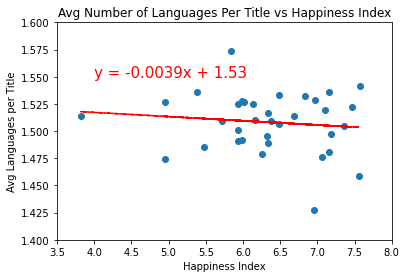

In [14]:
happiness_index = merge_df.loc[:,'Ladder score']
avg_Language_per_title = merge_df.loc[:,'Number of Languages']
plt.scatter(happiness_index,avg_Language_per_title)
text = "y = " + str(round(h_slope,4)) + "x + " + str(round(h_int,2))
text2 = print(f'''The r-value is {round(h_r,2)}, showing a negative correlation between Happiness Index
and Average Number of Languages available by Title.  However, the r-value of {round(h_r,2)} may have been due to chance.''')
plt.plot(happiness_index, h_fit, "--", color='r')
plt.title('Avg Number of Languages Per Title vs Happiness Index')
plt.annotate(text,(4,1.55),fontsize=15, color="r")
plt.axis([3.5,8,1.4,1.6])
plt.xlabel('Happiness Index',)
plt.ylabel('Avg Languages per Title')
plt.savefig('Images/Lang_Happy.png',facecolor='w')
plt.show()